<center><h1>Red Neuronal para la puerta lógica XOR</h1></center>

Se puede utilizar una operación XOR para clasificar la entrada. Usando dos entradas, las clasificará como 0 o 1. 0 representa una clase falsa y 1 representa una clase verdadera. Esto se basa en si son iguales entre sí o no entre sí (como se muestra en la tabla a continuación).

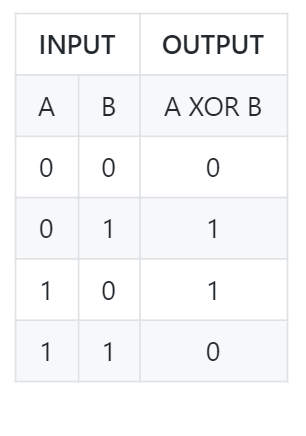

La red toma las dos entradas y las alimenta a dos neuronas. Luego pasa las salidas de estas dos neuronas a una neurona de salida, que proporcionará la clasificación de acuerdo con una tabla de verdad XOR representada por una matriz numpy.

XOR GATE como matriz numpy:
La matriz de números $X$ contiene los 4 conjuntos posibles de entradas 'A-B' de las dos primeras columnas de la tabla anterior.


<center><h1>Implementación de Red Neuronal que resuelve XOR</h1></center>

In [1]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

#### Training Data

La compuerta lógica XOR devuelve verdadero cuando el número de entradas dado es impar y falso cuando son pares. Aquí está el conjunto de datos de entrenamiento simple.

In [2]:
# Datos del Conjunto de Entrenamiento.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# Etiquetamos los datos del conjunto de entrenamiento.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [3]:
print('Conjunto de Entrenamiento:')
print(X)
print('\n')
print('Etiquetas del conjunto de entrenamiento')
print(y)

Conjunto de Entrenamiento:
[[0 1]
 [1 0]
 [1 1]
 [0 0]]


Etiquetas del conjunto de entrenamiento
[[1]
 [1]
 [0]
 [0]]


### Parametros Adicionales

In [4]:
# Estos son solo parámetros adicionales que son requeridos por los pesos para sus dimensiones.

num_i_units = 2 # Numero de entradas
num_h_units = 2 # Numero de unidades ocultas
num_o_units = 1 # Numero de salidas

### Parametros de la Red Neuronal

In [5]:
# Estos son los parámetros requeridos directamente por la red neuronal.

# Taza de aprendizaje del gradiente.
learning_rate = 0.01

# Parametro de ayuda para el overfitting.
reg_param = 0

# Numero de iteraciones para el Descenso del Gradiente.
max_iter = int(input("Dame el max_iter para el GD: "))
# 5000

# Numero de ejemplos de entrenamiento
m = int(input("Dame el numero de ejemplos de entrenamiento: ")) 
# 4

Dame el max_iter para el GD: 5000
Dame el numero de ejemplos de entrenamiento: 4


In [6]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [7]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]])

In [8]:
W2

array([[ 0.86540763, -2.3015387 ]])

In [9]:
B1

array([[0.41919451],
       [0.6852195 ]])

In [10]:
B2

array([[0.20445225]])

In [11]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

### Forward Propagation 

In [12]:
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Obtenemos el conjuto de entrenamiento como un vector columna.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [13]:
dW1 = 0 # Gradiente para W1
dW2 = 0 # Gradiente para W2

dB1 = 0 # Gradiente para B1
dB2 = 0 # Gradiente para B2

cost = np.zeros((max_iter, 1)) # Vector columna para guardar el costo de la Red Neuronal despues de aplicar el Descenso del Gradiente.

In [14]:

def train(_W1, _W2, _B1, _B2): 
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Actualiza el texto
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

In [15]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 5000 and 4

In [16]:
print('W1:')
print(W1)
print('\n')
print('W2:')
print(W2)
print('\n')
print('B1:')
print(B1)
print('\n')
print('B2:')
print(B2)

W1:
[[ 1.32260643 -0.42332921]
 [-1.4336158  -1.67239068]]


W2:
[[ 0.25299514 -2.21317287]]


B1:
[[ 0.37348207]
 [-0.22080277]]


B2:
[[0.24523225]]


### Ploteamos

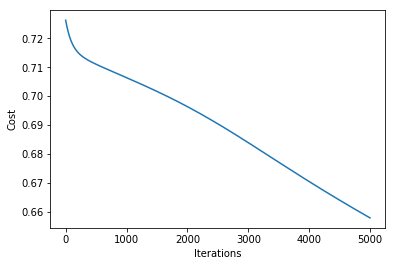

In [17]:
# Asiganmos los ejes a diferentes elementos.
plt.plot(range(max_iter), cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")

#Muestra la grafica
plt.show()